# Vocabulary Distribution Analysis
## HSK 1-3 Deck: Vocabulary Words by Tian Level and HSK Level

This notebook visualizes how vocabulary words are distributed across the Tian learning levels, broken down by HSK level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
print("📊 Loading vocabulary data...")
vocab_df = pd.read_parquet('data/vocabulary.parquet')
print(f"✓ Loaded {len(vocab_df)} vocabulary words")
print(f"✓ Columns: {list(vocab_df.columns)}")
vocab_df.head()

📊 Loading vocabulary data...
✓ Loaded 2227 vocabulary words
✓ Columns: ['tian_level', 'hsk_level', 'frequency_position', 'word', 'pinyin', 'meaning', 'stroke_count', 'is_surname']


,tian_level,hsk_level,frequency_position,word,pinyin,meaning,stroke_count,is_surname
0,1,1,21,一,yī,one/1/single/a (article)/as soon as/entire/who...,1,False
1,1,1,24,人,rén,"person/people/CL:個|个[ge4],位[wei4]",2,False
2,1,1,29,个,gè,individual/this/that/size/classifier for peopl...,3,False
3,1,1,94,中,Zhōng,China/Chinese; within/among/in/middle/center/w...,4,True
4,1,1,148,三,Sān,three/3,3,True


## Summary Statistics

In [2]:
# Total by HSK level
print("📚 Vocabulary by HSK Level:")
hsk_counts = vocab_df['hsk_level'].value_counts().sort_index()
for hsk, count in hsk_counts.items():
    pct = (count / len(vocab_df)) * 100
    print(f"   HSK {hsk}: {count:4d} words ({pct:5.1f}%)")
print(f"   Total:  {len(vocab_df):4d} words")

print("\n📊 Tian Level Statistics:")
tian_counts = vocab_df['tian_level'].value_counts().sort_index()
print(f"   Levels:  {vocab_df['tian_level'].min()} to {vocab_df['tian_level'].max()}")
print(f"   Min:     {tian_counts.min():.0f} words per level")
print(f"   Max:     {tian_counts.max():.0f} words per level")
print(f"   Mean:    {tian_counts.mean():.1f} words per level")
print(f"   Median:  {tian_counts.median():.0f} words per level")

📚 Vocabulary by HSK Level:
   HSK 1:  497 words ( 22.3%)
   HSK 2:  764 words ( 34.3%)
   HSK 3:  966 words ( 43.4%)
   Total:  2227 words

📊 Tian Level Statistics:
   Levels:  1 to 40
   Min:     15 words per level
   Max:     125 words per level
   Mean:    55.7 words per level
   Median:  52 words per level


## Multi-Bar Chart: Vocabulary Distribution by Level

✅ Saved to: data/vocab_distribution_by_level.png


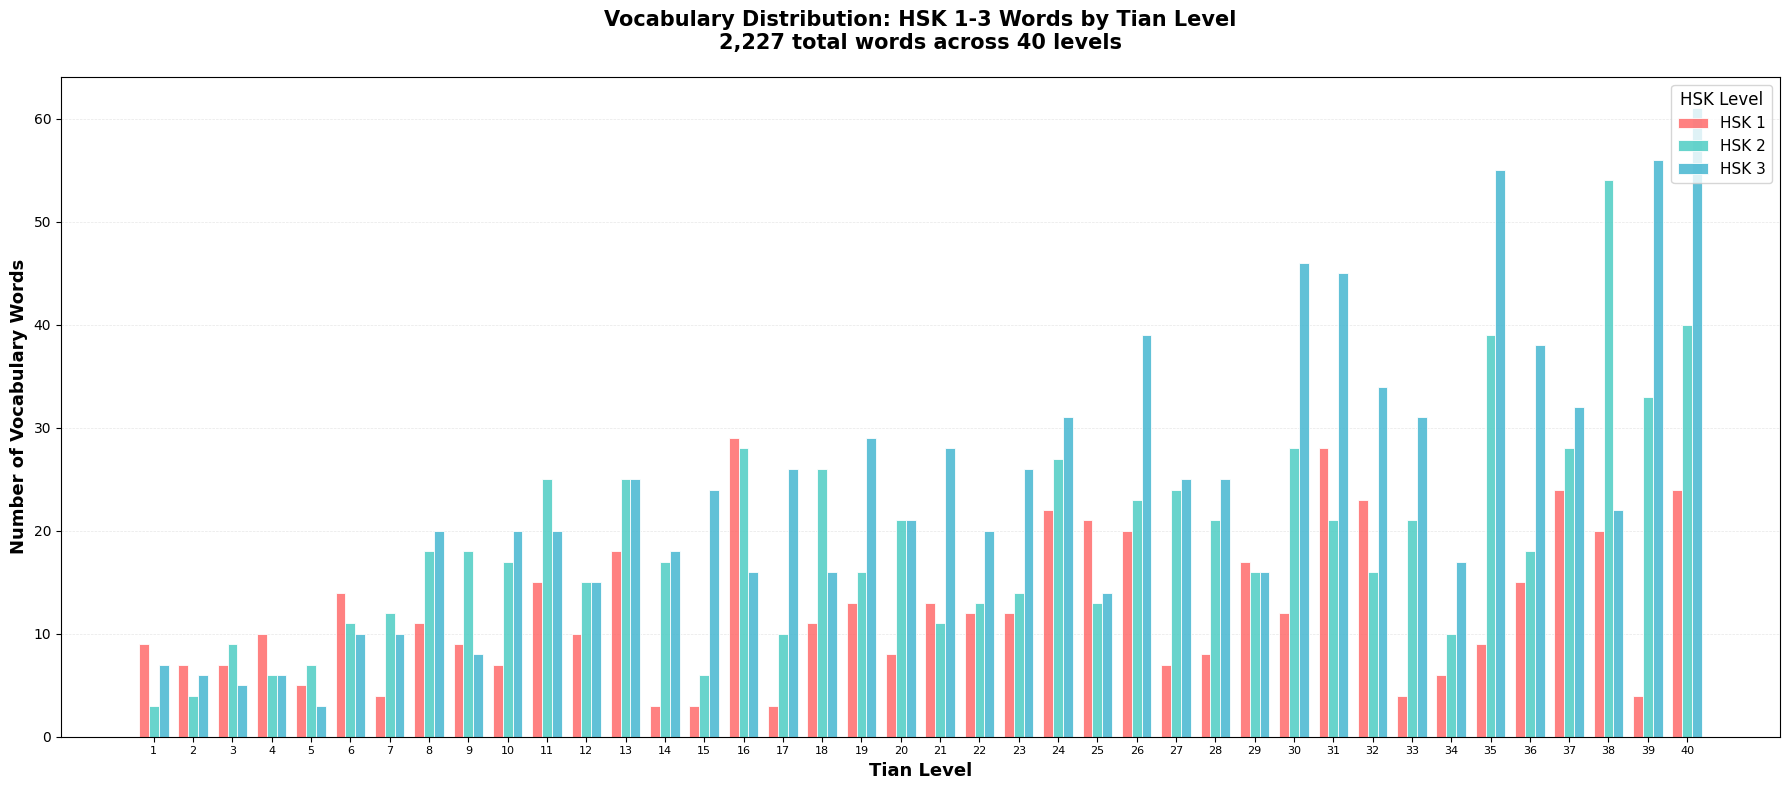

In [3]:
# Group by tian_level and hsk_level
distribution = vocab_df.groupby(['tian_level', 'hsk_level']).size().reset_index(name='count')

# Pivot to get HSK levels as columns
pivot_df = distribution.pivot(index='tian_level', columns='hsk_level', values='count').fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))

# Set up the bar positions
tian_levels = pivot_df.index.values
x = np.arange(len(tian_levels))
width = 0.25  # Width of each bar

# Colors for each HSK level
colors = {
    1: '#FF6B6B',  # Red - HSK 1
    2: '#4ECDC4',  # Teal - HSK 2
    3: '#45B7D1'   # Blue - HSK 3
}

# Create bars for each HSK level
bars = []
for i, hsk_level in enumerate(sorted(pivot_df.columns)):
    offset = (i - 1) * width
    bar = ax.bar(x + offset, pivot_df[hsk_level], width, 
                 label=f'HSK {int(hsk_level)}',
                 color=colors.get(int(hsk_level), '#95A5A6'),
                 alpha=0.85,
                 edgecolor='white',
                 linewidth=0.7)
    bars.append(bar)

# Customize
ax.set_xlabel('Tian Level', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Vocabulary Words', fontsize=13, fontweight='bold')
ax.set_title('Vocabulary Distribution: HSK 1-3 Words by Tian Level\n2,227 total words across 40 levels', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tian_levels, fontsize=8)
ax.legend(title='HSK Level', fontsize=11, title_fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('data/vocab_distribution_by_level.png', dpi=300, bbox_inches='tight')
print("✅ Saved to: data/vocab_distribution_by_level.png")
plt.show()

## Top 10 Levels with Most Vocabulary

In [4]:
# Find top 10 levels
top_levels = vocab_df.groupby('tian_level').size().sort_values(ascending=False).head(10)

print("🏆 Top 10 Tian Levels by Vocabulary Count:\n")
for level, count in top_levels.items():
    hsk_breakdown = vocab_df[vocab_df['tian_level'] == level].groupby('hsk_level').size()
    hsk_str = " | ".join([f"HSK{int(h)}:{c}" for h, c in hsk_breakdown.items()])
    print(f"   Level {level:2d}: {count:3d} words  ({hsk_str})")

🏆 Top 10 Tian Levels by Vocabulary Count:

   Level 40: 125 words  (HSK1:24 | HSK2:40 | HSK3:61)
   Level 35: 103 words  (HSK1:9 | HSK2:39 | HSK3:55)
   Level 38:  96 words  (HSK1:20 | HSK2:54 | HSK3:22)
   Level 31:  94 words  (HSK1:28 | HSK2:21 | HSK3:45)
   Level 39:  93 words  (HSK1:4 | HSK2:33 | HSK3:56)
   Level 30:  86 words  (HSK1:12 | HSK2:28 | HSK3:46)
   Level 37:  84 words  (HSK1:24 | HSK2:28 | HSK3:32)
   Level 26:  82 words  (HSK1:20 | HSK2:23 | HSK3:39)
   Level 24:  80 words  (HSK1:22 | HSK2:27 | HSK3:31)
   Level 16:  73 words  (HSK1:29 | HSK2:28 | HSK3:16)


## Detailed Table: First 15 Levels

In [5]:
# Create detailed breakdown table
first_15 = pivot_df.head(15).copy()
first_15['Total'] = first_15.sum(axis=1)
first_15.columns = ['HSK 1', 'HSK 2', 'HSK 3', 'Total']
first_15 = first_15.astype(int)

print("📋 Vocabulary Breakdown for First 15 Levels:\n")
display(first_15)

📋 Vocabulary Breakdown for First 15 Levels:



,HSK 1,HSK 2,HSK 3,Total
tian_level,,,,
1,9,3,7,19
2,7,4,6,17
3,7,9,5,21
4,10,6,6,22
5,5,7,3,15
6,14,11,10,35
7,4,12,10,26
8,11,18,20,49
9,9,18,8,35


## Stacked Bar Chart Alternative

✅ Saved to: data/vocab_distribution_stacked.png


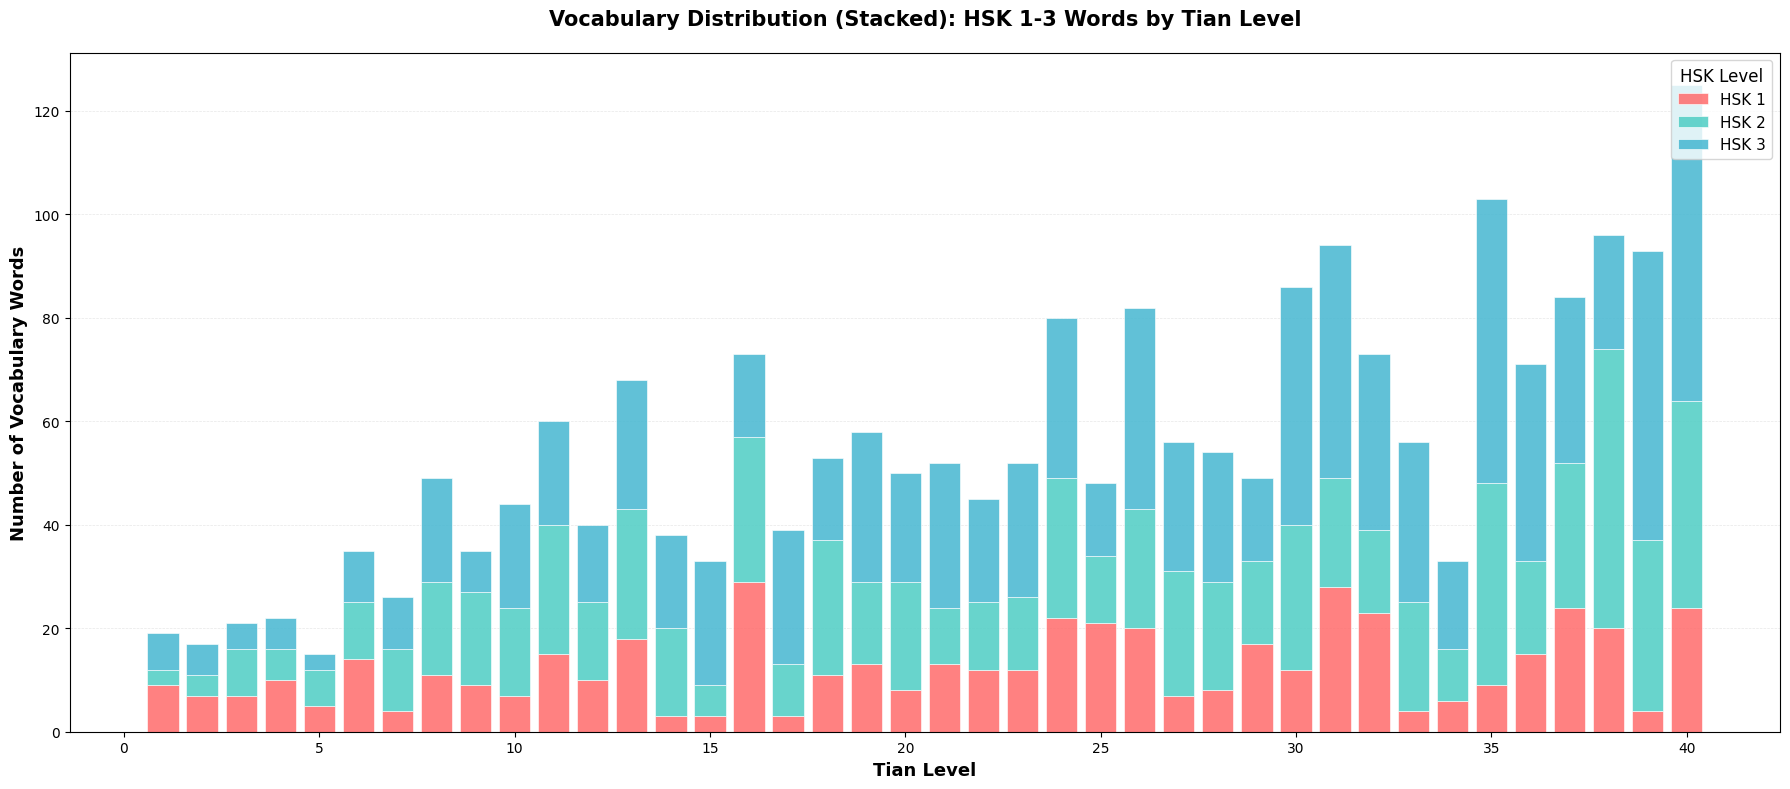

In [6]:
# Create stacked bar chart for comparison
fig, ax = plt.subplots(figsize=(18, 8))

# Stacked bars
bottom = np.zeros(len(pivot_df))
for hsk_level in sorted(pivot_df.columns):
    ax.bar(pivot_df.index, pivot_df[hsk_level], 
           label=f'HSK {int(hsk_level)}',
           bottom=bottom,
           color=colors.get(int(hsk_level), '#95A5A6'),
           alpha=0.85,
           edgecolor='white',
           linewidth=0.5)
    bottom += pivot_df[hsk_level].values

ax.set_xlabel('Tian Level', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Vocabulary Words', fontsize=13, fontweight='bold')
ax.set_title('Vocabulary Distribution (Stacked): HSK 1-3 Words by Tian Level', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(title='HSK Level', fontsize=11, title_fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('data/vocab_distribution_stacked.png', dpi=300, bbox_inches='tight')
print("✅ Saved to: data/vocab_distribution_stacked.png")
plt.show()

## HSK Level Proportions by Tian Level

✅ Saved to: data/vocab_distribution_proportions.png


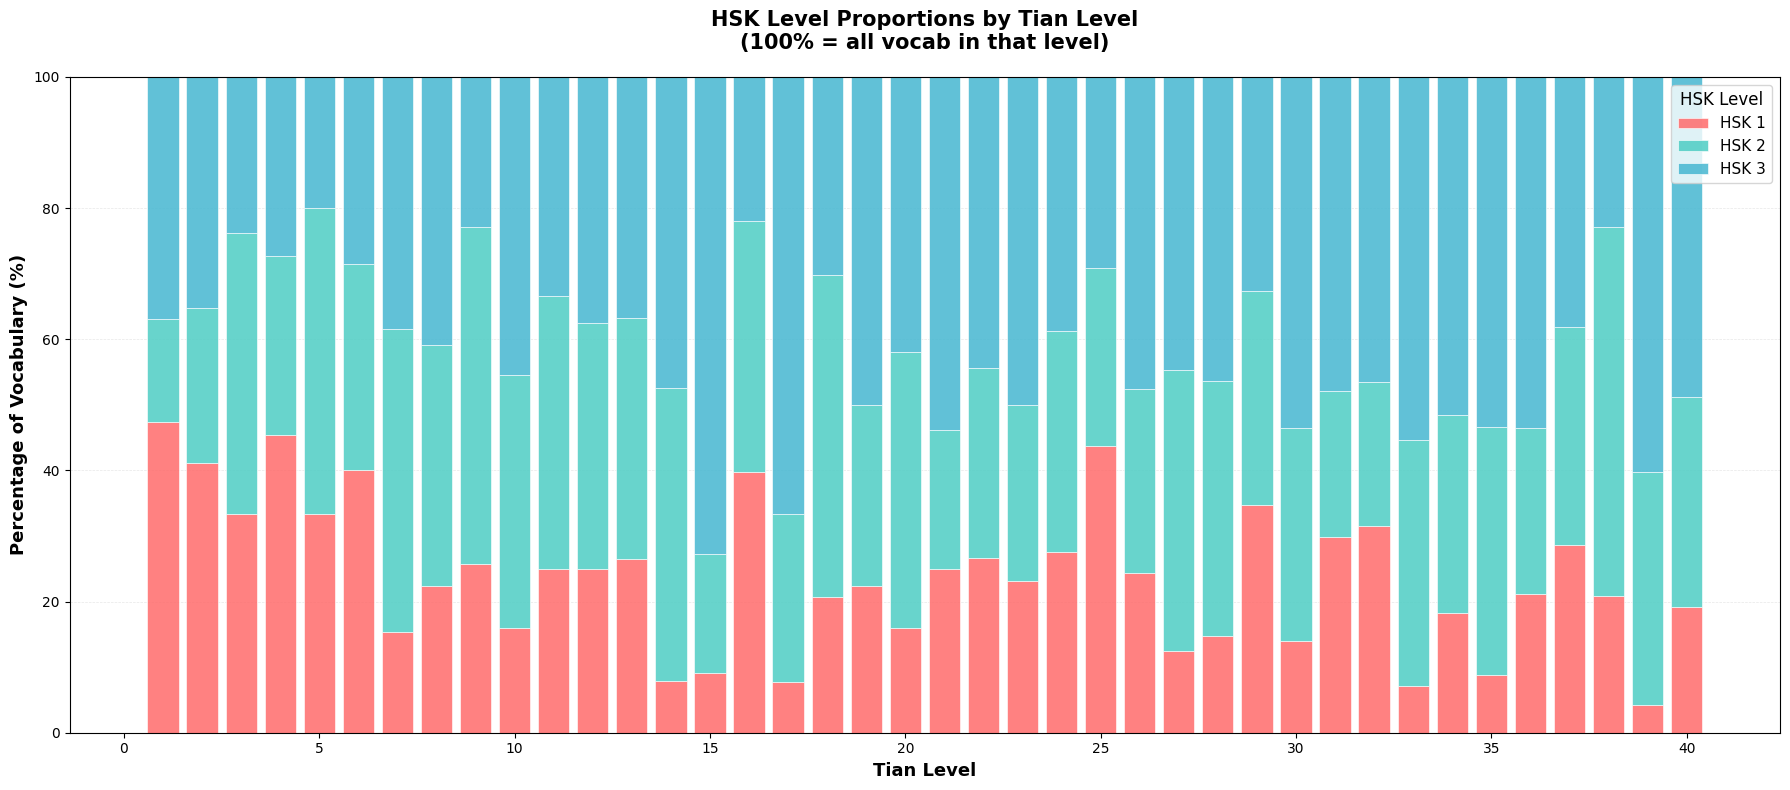

In [7]:
# Calculate proportions
proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(18, 8))

# Stacked percentage bars
bottom = np.zeros(len(proportions))
for hsk_level in sorted(proportions.columns):
    ax.bar(proportions.index, proportions[hsk_level], 
           label=f'HSK {int(hsk_level)}',
           bottom=bottom,
           color=colors.get(int(hsk_level), '#95A5A6'),
           alpha=0.85,
           edgecolor='white',
           linewidth=0.5)
    bottom += proportions[hsk_level].values

ax.set_xlabel('Tian Level', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Vocabulary (%)', fontsize=13, fontweight='bold')
ax.set_title('HSK Level Proportions by Tian Level\n(100% = all vocab in that level)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(title='HSK Level', fontsize=11, title_fontsize=12, loc='upper right')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('data/vocab_distribution_proportions.png', dpi=300, bbox_inches='tight')
print("✅ Saved to: data/vocab_distribution_proportions.png")
plt.show()